In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pathlib
import itertools
%precision % .4f
import warnings
warnings.filterwarnings('ignore')

# Датасет
Будет использоваться датасет из условия задачи

In [22]:
df = pd.read_csv("car_price.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Нулевых значений нет

## Data cleaning

In [24]:
from sklearn import preprocessing
# Удалим уникальные значения
df.drop(columns=["car_ID", "CarName"], inplace=True)
# Преобразуем категориальные переменные
label_encoder = preprocessing.LabelEncoder() 
df['fueltype'] = label_encoder.fit_transform(df['fueltype']) 
df['doornumber']= label_encoder.fit_transform(df['doornumber']) 
df['carbody']= label_encoder.fit_transform(df['carbody']) 
df['drivewheel']= label_encoder.fit_transform(df['drivewheel']) 
df['enginelocation']= label_encoder.fit_transform(df['enginelocation']) 
df['cylindernumber']= label_encoder.fit_transform(df['cylindernumber']) 
df['enginetype']= label_encoder.fit_transform(df['enginetype']) 
df['cylindernumber']= label_encoder.fit_transform(df['cylindernumber']) 
df['fuelsystem']= label_encoder.fit_transform(df['fuelsystem']) 
df['aspiration']= label_encoder.fit_transform(df['aspiration']) 

In [6]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


### Посторим корреляционную матрицу

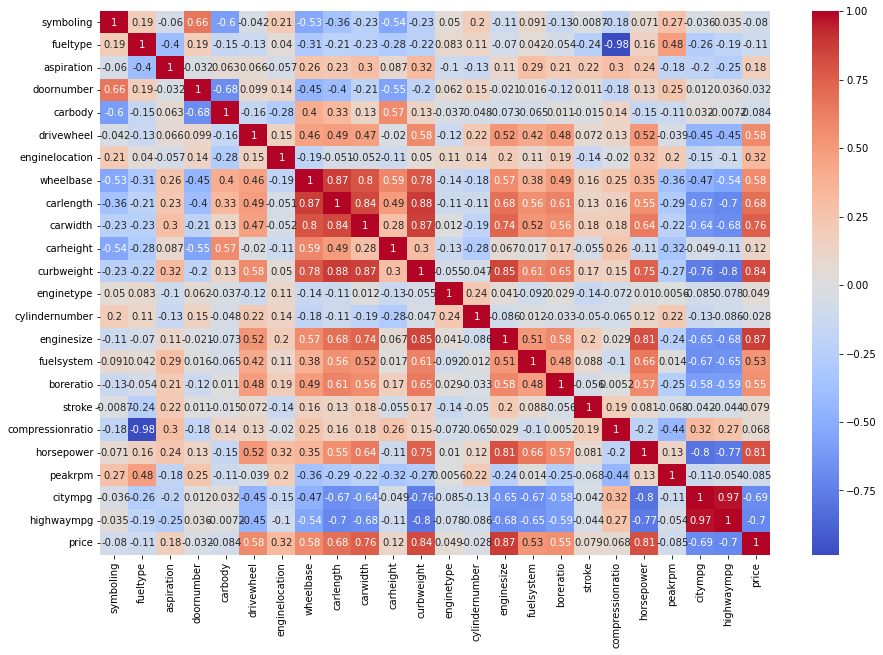

In [25]:
df_corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

- Положительная корреляция с ценой:
    - enginesize (0.874145): Это ожидаемо, поскольку более крупные двигатели обычно связаны с более дорогими автомобилями.
    - curbweight (0.835305): Вес автомобиля также положительно связан с ценой, что вполне логично.
- Отрицательная корреляция с ценой:
    - highwaympg (-0.697599) и citympg (-0.685751): Оба эти параметра имеют сильную отрицательную корреляцию с ценой, что означает, что более высокая экономичность топлива связана с более низкой ценой автомобиля.
    - carlength (-0.704662) и carwidth (-0.677218): Размеры автомобиля также имеют негативную корреляцию с ценой, что может быть связано с тем, что более длинные и широкие автомобили могут быть менее дорогими.
- Другое
    - horsepower (0.808139): Мощность двигателя имеет сильную положительную корреляцию с ценой, что означает, что более мощные автомобили чаще всего дороже.
    - fueltype (-0.105679) и aspiration (0.177926): Тип топлива и наличие турбонаддува также оказывают влияние на цену, но корреляции не очень сильные.

In [9]:
df.drop(columns=["carlength", "carwidth", "curbweight", "enginesize", "cylindernumber", "horsepower", "citympg", "highwaympg"], inplace=True)

# RFE

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

X = df.drop(columns="price")
y = df["price"]

# Создадим модель для RFE, используя Pipeline
estimator = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", Ridge())
])

# Инициализируем RFECV
rfe = RFECV(
    estimator=estimator,
    importance_getter=lambda x: x.named_steps["regressor"].coef_
)

# Проведем отбор признаков
rfe.fit(X, y)
print(f"оличество отобранных признаков: {rfe.n_features_}")
print(f"Отобранные признаки: {list(X.columns[rfe.support_])}")

оличество отобранных признаков: 4
Отобранные признаки: ['enginelocation', 'carwidth', 'curbweight', 'enginesize']


Избавимся от остальных признаков

In [27]:
columns_to_drop = [col for col in X.columns if col not in list(X.columns[rfe.support_])]
X.drop(columns=columns_to_drop, inplace=True)

In [29]:
X.head()

,enginelocation,carwidth,curbweight,enginesize
0,0,64.1,2548,130
1,0,64.1,2548,130
2,0,65.5,2823,152
3,0,66.2,2337,109
4,0,66.4,2824,136


# Градиентный спуск

In [12]:
from sklearn.base import RegressorMixin, BaseEstimator
import abc
# Собственная реализацию линейной регрессии с различными методами оптимизации 
(градиентным спуском, мини-пакетным градиентным спуском)
class MyLinearRegression(RegressorMixin, BaseEstimator, abc.ABC):
    def __init__(self, alpha=1, max_iter=1000, tol=1e-4, learning_rate=0.001, alg_type='gd', batch_size=32):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.learning_rate = learning_rate
        self.coefficients = None
        self.alg_type = alg_type
        # Обычный градиентный спуск
        if alg_type == 'gd':
            self.batch_size = 0
        # MBGD
        elif alg_type == 'mbgd':
            self.batch_size = batch_size
        # SGD
        elif alg_type == 'sgd':
            self.batch_size = 1
        else:
            raise ValueError("Invalid alg_type, should be one of ['gd', 'mbgd', 'sgd']")

    def fit(self, X, y):
        # Свободный коэффициент
        y = y.array
        X = np.c_[np.ones(X.shape[0]), X]
        num_samples, num_features = X.shape
        if self.alg_type == 'gd':
            self.batch_size=num_samples
        self.coefficients = np.ones(num_features)

        for iteration in range(self.max_iter):
            # Перемешиваем данные и делим на батчи
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            for batch_start in range(0, num_samples, self.batch_size):
                batch_indices = indices[batch_start:batch_start + self.batch_size]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                y_pred = X_batch.dot(self.coefficients)
                gradient = (-1.0 / self.batch_size) * X_batch.T.dot(y_batch - y_pred)
                self.coefficients -= self.learning_rate * gradient

            if np.linalg.norm(gradient) <= self.tol:
                break

        return self
    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        predictions = X.dot(self.coefficients)
        return predictions
    

In [13]:
class MyLinearRegressionSGD(RegressorMixin, BaseEstimator, abc.ABC):
    def __init__(self, alpha=1, max_iter=5000, tol=1e-5, learning_rate=0.01):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.learning_rate = learning_rate
        self.coefficients = None

    def fit(self, X, y):
        y = y.array
        X = np.c_[np.ones(X.shape[0]), X]
        num_samples, num_features = X.shape
        self.coefficients = np.ones(num_features)

        for iteration in range(self.max_iter):
            indices = np.arange(num_samples)
            np.random.shuffle(indices)

            for i in indices:
                X_sample = X[i]
                y_sample = y[i]

                y_pred = np.dot(X_sample, self.coefficients)
                gradient = -X_sample * (y_sample - y_pred)
                self.coefficients -= self.learning_rate * gradient

                if np.linalg.norm(gradient) <= self.tol:
                    break

        return self

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        predictions = np.dot(X, self.coefficients)
        return predictions

# Обучение

In [14]:
# Обучение без кроссвалидации
# Импортируем необходимые библиотеки и классы
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Определяем функцию для обучения регрессора и оценки его производительности
def train_and_evaluate_regressor(regressor, name, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)
    
    # Создаем пайплайн для стандартизации данных и применения регрессора
    model = Pipeline([("scaler", StandardScaler()), ("regressor", regressor)])
    
    # Обучаем модель на обучающих данных
    model.fit(X_train, y_train)

    # Предсказываем значения на обучающем наборе и вычисляем метрики
    pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    rmse_train = mean_squared_error(y_train, pred_train, squared=False)
    r2_train = r2_score(y_train, pred_train)

    # Предсказываем значения на тестовом наборе и вычисляем метрики
    pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, pred_test)
    rmse_test = mean_squared_error(y_test, pred_test, squared=False)
    r2_test = r2_score(y_test, pred_test)

    # Возвращаем результаты обучения и оценки производительности модели
    return [name, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test]

# Создаем список регрессоров, которые мы хотим обучить
regressors = [
    (Ridge(), "Ridge"),
    (MyLinearRegression(), "Самописный градиентный спуск"),
    (MyLinearRegression(alg_type="mbgd"), "Самописный MBGD градиентный спуск"),
    (MyLinearRegressionSGD(), "Самописный SGD градиентный спуск")
]

# Обучаем каждый регрессор и записываем результаты в список
results = []
for regressor, name in regressors:
    results.append(train_and_evaluate_regressor(regressor, name, X, y))

# Создаем DataFrame для отображения результатов
import pandas as pd
results_df = pd.DataFrame(results, columns=["Regressor", "MSE train", "MSE test", "RMSE train", "RMSE test", "R2 train", "R2 test"])
results_df

,Regressor,MSE train,MSE test,RMSE train,RMSE test,R2 train,R2 test
0,Ridge,2.085022e+07,2.526990e+07,4566.203934,5026.917670,0.685392,0.570394
1,Самописный градиентный спуск,5.454751e+07,5.097063e+07,7385.628319,7139.372061,0.176936,0.133463
2,Самописный MBGD градиентный спуск,2.181326e+07,2.530992e+07,4670.466271,5030.896223,0.670861,0.569713
3,Самописный SGD градиентный спуск,2.085751e+07,2.550775e+07,4567.002566,5050.519597,0.685282,0.566350


- Ridge регрессия демонстрирует наилучшие результаты с наименьшими значениями MSE и RMSE на тестовом наборе данных, а также высоким R2.
- Самописный градиентный спуск проявляет себя наихудшим образом с более высокими значениями MSE и RMSE на тестовом наборе данных и низким R2.
- Самописные MBGD и SGD градиентные спуски показывают результаты, близкие к Ridge регрессии, но с небольшими отличиями в MSE и RMSE.

## С кроссвалидацией и подбором гиперпараметров

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Функция для обучения регрессора с использованием GridSearchCV
def train_with_grid_search(regressor, name, param_grid):
    model = Pipeline([("scaler", StandardScaler()), ("regressor", regressor)])
    param_grid = {f"regressor__{param_name}": param_values for param_name, param_values in param_grid.items()}
    
    grid_search = GridSearchCV(
        model,
        param_grid,
        scoring=["neg_mean_squared_error", "neg_root_mean_squared_error", "r2"],
        refit="neg_mean_squared_error",
        return_train_score=True
    )
    
    # Обучаем модель с перебором гиперпараметров и выводим лучшие
    grid_search.fit(X, y)
    print(f"{name} - Лучшие гиперпараметры:")
    best_params = {param_name: param_value for param_name, param_value in grid_search.best_params_.items()}
    print(best_params)

    result = pd.DataFrame(grid_search.cv_results_).iloc[grid_search.best_index_]
    data = []
    indexies = []
    column_names = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Mean", "STD"]

    metrics = [
        ("MSE", "neg_mean_squared_error"),
        ("RMSE", "neg_root_mean_squared_error"),
        ("R2", "r2")
    ]

    # Собираем данные о метриках
    for metric_name, metric in metrics:
        for run_type in ["train", "test"]:
            row = [result[f"split{i}_{run_type}_{metric}"] for i in range(5)]
            row.append(result[f"mean_{run_type}_{metric}"])
            row.append(result[f"std_{run_type}_{metric}"])
            data.append(row)
            indexies.append(f"{metric_name} ({run_type})")

    return pd.DataFrame(data=data, index=indexies, columns=column_names)

In [16]:
train_with_grid_search(MyLinearRegression(), "Свой градиентный спуск", {"alpha": [i * 10 for i in range(1, 10)], "max_iter": [5000, 10000]})

Свой градиентный спуск - Лучшие гиперпараметры:
{'regressor__alpha': 10, 'regressor__max_iter': 5000}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),-1.991730e+07,-1.764923e+07,-2.206153e+07,-2.476614e+07,-2.295883e+07,-2.147061e+07,2.467395e+06
MSE (test),-3.447070e+07,-6.740047e+07,-2.760004e+07,-5.715539e+07,-2.968383e+07,-4.326209e+07,1.601651e+07
RMSE (train),-4.462880e+03,-4.201099e+03,-4.696970e+03,-4.976559e+03,-4.791538e+03,-4.625809e+03,2.692507e+02
RMSE (test),-5.871176e+03,-8.209779e+03,-5.253574e+03,-7.560119e+03,-5.448287e+03,-6.468587e+03,1.191416e+03
R2 (train),6.743636e-01,5.983909e-01,7.004069e-01,6.069531e-01,6.932940e-01,6.546817e-01,4.339529e-02
R2 (test),5.268011e-01,4.786497e-01,-4.819448e-01,1.044645e-01,-6.496052e-01,-4.326931e-03,4.840872e-01


- Среднее значение RMSE на тестовой выборке (примерно -6.468587e+03) показывает, что модель, вероятно, не идеально предсказывает целевую переменную, и ошибка в средних значениях составляет около 6468.6.

- Среднее значение коэффициента детерминации (R2) на тестовой выборке (примерно -0.0043269) также указывает на то, что модель не очень хорошо объясняет изменчивость целевой переменной на тестовой выборке.

- На тестовой выборке модель имеет отрицательное R2 для некоторых фолдов, что может указывать на переобучение модели.

In [17]:
train_with_grid_search(Ridge(), "Ridge", {"alpha": [i * 10 for i in range(1, 10)]})

Ridge - Лучшие гиперпараметры:
{'regressor__alpha': 30}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),-2.134310e+07,-1.821030e+07,-2.368207e+07,-2.605316e+07,-2.429305e+07,-2.271634e+07,2.710836e+06
MSE (test),-3.523535e+07,-7.434601e+07,-2.182858e+07,-5.571848e+07,-2.570793e+07,-4.256727e+07,1.975313e+07
RMSE (train),-4.619859e+03,-4.267353e+03,-4.866423e+03,-5.104229e+03,-4.928798e+03,-4.757332e+03,2.900404e+02
RMSE (test),-5.935938e+03,-8.622413e+03,-4.672107e+03,-7.464481e+03,-5.070299e+03,-6.353047e+03,1.485281e+03
R2 (train),6.510527e-01,5.856237e-01,6.784002e-01,5.865277e-01,6.754702e-01,6.354149e-01,4.139038e-02
R2 (test),5.163043e-01,4.249252e-01,-1.720548e-01,1.269788e-01,-4.286543e-01,9.349984e-02,3.557784e-01


- Среднее значение RMSE на тестовой выборке (примерно -6.353047e+03) показывает, что модель Ridge, вероятно, лучше предсказывает целевую переменную на тестовой выборке по сравнению с собственным градиентным спуском (RMSE около 6.4686).

- Среднее значение коэффициента детерминации (R2) на тестовой выборке (примерно 0.0934998) собственного градиентного спуска (R2 около -0.0043269), но все равно показывает некоторое смещение модели относительно идеальной линейной модели.

In [18]:
train_with_grid_search(MyLinearRegression(alg_type="mbgd"), "Свой MBGD", {"alpha": [0.001, 0.01, 0.1, 1], "max_iter": [5000, 7000]})

Свой MBGD - Лучшие гиперпараметры:
{'regressor__alpha': 0.1, 'regressor__max_iter': 7000}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),-1.951664e+07,-1.750122e+07,-2.165286e+07,-2.409995e+07,-2.254421e+07,-2.106298e+07,2.317002e+06
MSE (test),-3.502513e+07,-5.980935e+07,-3.130934e+07,-6.482138e+07,-2.788249e+07,-4.376954e+07,1.539204e+07
RMSE (train),-4.417764e+03,-4.183446e+03,-4.653264e+03,-4.909170e+03,-4.748075e+03,-4.582344e+03,2.551539e+02
RMSE (test),-5.918204e+03,-7.733650e+03,-5.595475e+03,-8.051173e+03,-5.280387e+03,-6.515778e+03,1.146376e+03
R2 (train),6.809142e-01,6.017590e-01,7.059566e-01,6.175258e-01,6.988329e-01,6.609977e-01,4.300813e-02
R2 (test),5.191902e-01,5.373679e-01,-6.811106e-01,-1.564951e-02,-5.494999e-01,-3.794039e-02,5.132703e-01


- Среднее значение RMSE на тестовой выборке (примерно -6.515778e+03) показывает, что MBGD, вероятно, лучше предсказывает целевую переменную на тестовой выборке по сравнению с собственным градиентным спуском (RMSE около 6.4686) и моделью Ridge (RMSE около 6.353).

- Среднее значение коэффициента детерминации (R2) на тестовой выборке (примерно -0.0379404) также выше, чем у собственного градиентного спуска (R2 около -0.0043269) и модели Ridge (R2 около 0.0934998), что указывает на более высокую способность MBGD объяснять изменчивость целевой переменной на тестовой выборке.

In [19]:
train_with_grid_search(MyLinearRegressionSGD(), "Свой SGD", {"alpha": [0.001, 0.01, 0.1, 1], "max_iter": [5000, 7000]})

Свой SGD - Лучшие гиперпараметры:
{'regressor__alpha': 0.01, 'regressor__max_iter': 7000}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),-1.959955e+07,-1.758622e+07,-2.170486e+07,-2.423263e+07,-2.274700e+07,-2.117405e+07,2.343604e+06
MSE (test),-3.678777e+07,-5.653151e+07,-3.026616e+07,-6.777321e+07,-2.312148e+07,-4.289603e+07,1.668927e+07
RMSE (train),-4.427138e+03,-4.193593e+03,-4.658848e+03,-4.922665e+03,-4.769381e+03,-4.594325e+03,2.573530e+02
RMSE (test),-6.065292e+03,-7.518744e+03,-5.501469e+03,-8.232449e+03,-4.808480e+03,-6.425287e+03,1.269534e+03
R2 (train),6.795586e-01,5.998247e-01,7.052505e-01,6.154200e-01,6.961239e-01,6.592355e-01,4.322175e-02
R2 (test),4.949935e-01,5.627223e-01,-6.250987e-01,-6.190004e-02,-2.849187e-01,1.715968e-02,4.551838e-01


- Среднее значение RMSE на тестовой выборке (примерно -6.425287e+03) показывает, что метод стохастического градиентного спуска (SGD), вероятно, лучше предсказывает целевую переменную на тестовой выборке по сравнению с собственным градиентным спуском (RMSE около 6.4686), моделью Ridge (RMSE около 6.353) и MBGD (RMSE около 6.5157).

- Среднее значение коэффициента детерминации (R2) на тестовой выборке (примерно 0.0171597) также выше, чем у собственного градиентного спуска (R2 около -0.0043269), модели Ridge (R2 около 0.0934998) и MBGD (R2 около -0.0379404).

# Вывод

Исходя из этих результатов, можно сделать вывод, что модель SGD с лучшими гиперпараметрами alpha = 0.01 и max_iter = 7000 показывает наилучшие результаты среди предоставленных методов регрессии. Она обеспечивает наиболее низкий RMSE на тестовой выборке и относительно высокий коэффициент детерминации (R2), что указывает на хорошее качество прогнозов. Модель Ridge также показала хорошие результаты, но RMSE и R2 у модели SGD лучше. В то время как собственный градиентный спуск и MBGD показали более низкое качество прогнозов.